In [ ]:
pip install librosa

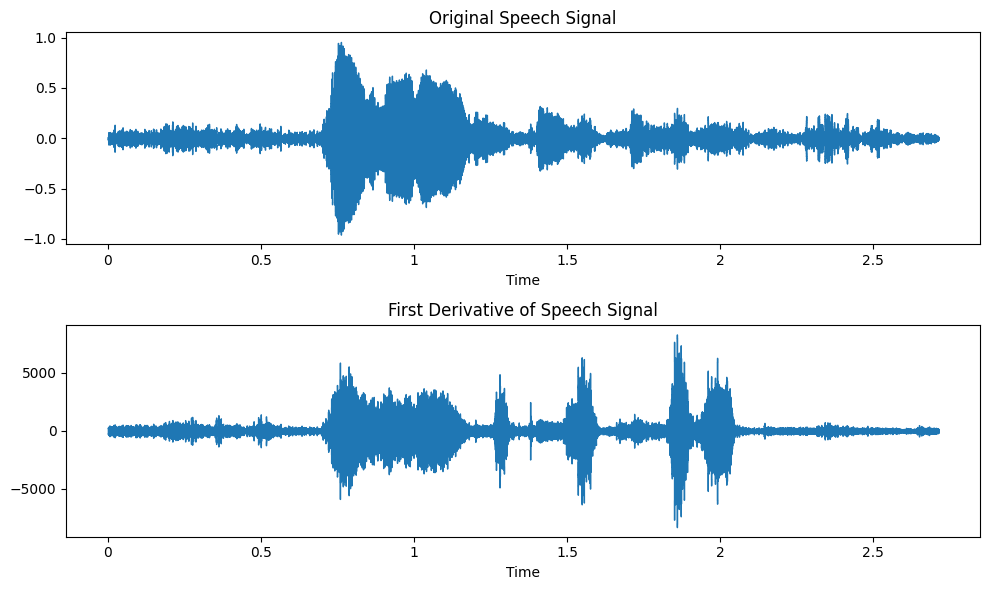

In [ ]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load the audio file
file_path = '/content/AI_IN_SP_AUDIO_RECORDING.wav'
signal, sample_rate = librosa.load(file_path, sr=None)

# Compute the finite difference (first derivative)
delta_t = 1 / sample_rate
first_derivative = np.diff(signal) / delta_t

# Plot the original signal and its first derivative
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
librosa.display.waveshow(signal, sr=sample_rate)
plt.title('Original Speech Signal')

plt.subplot(2, 1, 2)
librosa.display.waveshow(first_derivative, sr=sample_rate)
plt.title('First Derivative of Speech Signal')

plt.tight_layout()
plt.show()


In [ ]:
# Assuming you have already computed the 'time_intervals' array
# Replace 'threshold_speech' and 'threshold_silence' with your actual threshold values

# Set your chosen thresholds (adjust these values as needed)
threshold_speech = 100  # Example: Minimum duration for speech (in samples)
threshold_silence = 50  # Example: Maximum duration for silence (in samples)

# Assuming you have already computed the 'first_derivative' signal
# Replace 'threshold_speech' and 'threshold_silence' with your actual threshold values

# Detect zero crossings
zero_crossings = np.where(np.diff(np.sign(first_derivative)))[0]

# Calculate time intervals between consecutive zero crossings
time_intervals = np.diff(zero_crossings)

# Set your chosen thresholds (adjust these values as needed)
threshold_speech = 100  # Example: Minimum duration for speech (in samples)
threshold_silence = 50  # Example: Maximum duration for silence (in samples)

# Separate speech and silence regions
speech_intervals = time_intervals[time_intervals > threshold_speech]
silence_intervals = time_intervals[time_intervals <= threshold_silence]

# Compute average lengths
average_speech_length = np.mean(speech_intervals)
average_silence_length = np.mean(silence_intervals)

print(f"Average speech length: {average_speech_length:.2f} samples")
print(f"Average silence length: {average_silence_length:.2f} samples")



Average speech length: 110.00 samples
Average silence length: 7.78 samples


In [ ]:
import wave

def get_audio_duration(filename):
    with wave.open(filename, 'rb') as audio_file:
        frames = audio_file.getnframes()
        frame_rate = audio_file.getframerate()
        duration = frames / frame_rate
    return duration

def estimate_words(duration, average_wpm=150):
    # Assuming an average speaking rate of 150 words per minute (wpm)
    return int(duration * average_wpm / 60)

# Replace 'LAB_2_5-WORDS.wav' with the actual path to your audio file
audio_file_path = '/content/LAB_2_5-WORDS.wav'
speech_duration = get_audio_duration(audio_file_path)
estimated_word_count = estimate_words(speech_duration)

print(f"Estimated word count in the speech: {estimated_word_count} words")


Estimated word count in the speech: 15 words


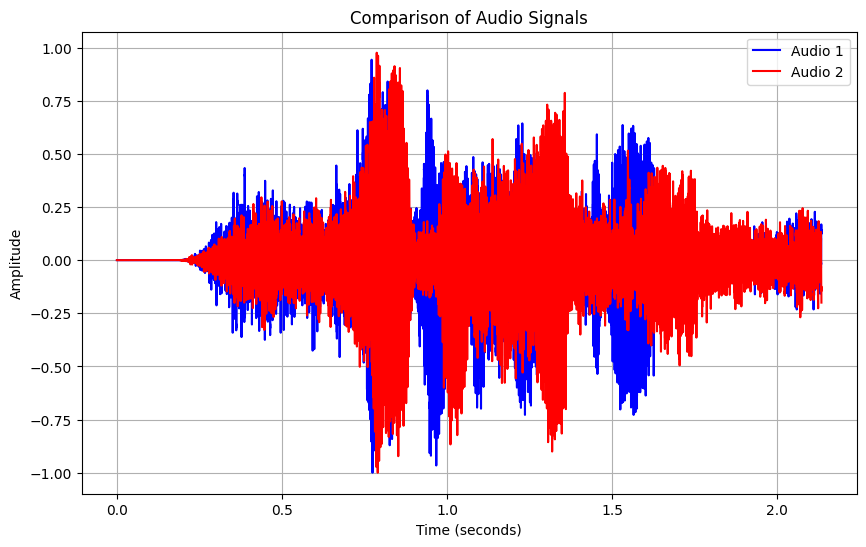

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Load the first audio file
sample_rate_1, audio_data_1 = wavfile.read("/content/question_lab2.wav")

# Load the second audio file
sample_rate_2, audio_data_2 = wavfile.read("/content/statement_lab2.wav")

# Ensure both audio signals have the same length
min_length = min(len(audio_data_1), len(audio_data_2))
audio_data_1 = audio_data_1[:min_length]
audio_data_2 = audio_data_2[:min_length]

# Check if both audio files have the same sample rate
if sample_rate_1 != sample_rate_2:
    raise ValueError("Sample rates of the audio files do not match.")

# Normalize audio data to be in the range [-1, 1]
audio_data_1 = audio_data_1.astype(float) / np.max(np.abs(audio_data_1))
audio_data_2 = audio_data_2.astype(float) / np.max(np.abs(audio_data_2))

# Create time axis for plotting
time_axis = np.arange(len(audio_data_1)) / sample_rate_1

# Plot both audio signals on the same graph
plt.figure(figsize=(10, 6))
plt.plot(time_axis, audio_data_1, color='blue', label='Audio 1')
plt.plot(time_axis, audio_data_2, color='red', label='Audio 2')
plt.title('Comparison of Audio Signals')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()